## Download images from Cygnet

In [1]:
import json
import requests
from pathlib import Path

In [6]:
cygnet_url = 'https://cygnet.sccs.swarthmore.edu/'

In [2]:
image_path = Path('./images')
image_path.mkdir(exist_ok=True)

This code assumes that you have downloaded json files from Cygnet's search API (which requires being logged in), and saved them to the `./rosters` folder. I retrieved `2022.json` by visiting and saving https://cygnet.sccs.swarthmore.edu/backend/?terms=2022 and so on for each class year.

In [8]:
roster_path = Path('./rosters')
list(roster_path.iterdir())

[PosixPath('rosters/2024.json'),
 PosixPath('rosters/2021.json'),
 PosixPath('rosters/2022.json'),
 PosixPath('rosters/2023.json')]

This generator makes it easy to iterate over all students in the json files in the rosters folder. Each student returned is a dict that looks like this:

```json
{
  "first": "John",
  "last": "Doe",
  "year": "2022",
  "photo": "media/photos/vanilla/jdoe1_c.jpg",
  "address": "Parrish 000",
  "middle": "",
  "email": "jdoe1",
  "phone": ""
}
```

In [10]:
def iterate_rosters():
    for roster_file in roster_path.iterdir():
        roster = json.loads(roster_file.read_text())
        for person in roster['data']:
            yield person

Download each person's photo, and save it to `./images/<email>.jpg`. For example, my photo would be in `./images/jli2.jpg`.

In [13]:
for person in iterate_rosters():
    url = cygnet_url + person['photo']
    response = requests.get(url)
    filename = image_path / (person['email'] + '.jpg')
    with open(filename, 'wb+') as f:
        f.write(response.content)

len(list(image_path.iterdir()))

610

## Compute the average face

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from facer import facer

Loading face detector and landmark prediction models...
Done, models loaded.


In [6]:
%%capture

images = facer.load_images(image_path)
landmarks, faces = facer.detect_face_landmarks(images)

In [4]:
average_face = facer.create_average_face(faces, landmarks, save_image=True)


Starting face averaging for 539 faces.
Image 1 / 539
Image 28 / 539
Image 55 / 539
Image 82 / 539
Image 109 / 539
Image 136 / 539
Image 163 / 539
Image 190 / 539
Image 217 / 539
Image 244 / 539
Image 271 / 539
Image 298 / 539
Image 325 / 539
Image 352 / 539
Image 379 / 539
Image 406 / 539
Image 433 / 539
Image 460 / 539
Image 487 / 539
Image 514 / 539
Done.


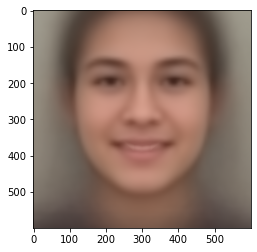

In [7]:
plt.imshow(average_face)

In [12]:
matplotlib.image.imsave('average_face.jpg', average_face)

## Generate likely names using markov chains

In [20]:
import markovify

Convert names to lowercase and split them by character, so that the markov chain operates on the character level

In [27]:
first_names = []
last_names = []

for person in iterate_rosters():
    first_names.append(' '.join(list(person['first'].lower())))
    last_names.append(' '.join(list(person['last'].lower())))

first_names[:5]

['a n t h o n y',
 'a d r i a n n a',
 'a n u s h a',
 'a m a n d a',
 'a n t o n i o']

Build two markov models—one for first name, and another for last name—on bigrams (state size of two characters) so that the generated names are pronounceable but don't make too much sense.

In [25]:
first_name_model = markovify.NewlineText('\n'.join(first_names), state_size=2)
last_name_model = markovify.NewlineText('\n'.join(last_names), state_size=2)

In [26]:
for i in range(10):
    first = ''.join(first_name_model.make_sentence().split(' ')).title()
    last = ''.join(last_name_model.make_sentence().split(' ')).title()

    print(first, last)

Joshil Bashaporay
Davian Vang
Aleani Atang
Faid Bryand
Danna Patsang
Chandren Jing
Kenie Chrandov
Saber Daghtermangongs
Paulion Khallin
Samry Lummarkderg
